## Importación y lectura de datos

In [1]:
# importar de drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!ls /content/drive/MyDrive/Preparatorio/Optimizacion

 AL_programacion_lineal.ipynb
 intervalos_temporales_por_fabricante.png
'Kochenderfer, Mykel J._ Wheeler, Tim Allan - Algorithms for optimization-The MIT Press (2019).pdf'
 mantenimiento_equipos.csv
 mantenimiento_equipos.gsheet
 mantenimiento_equipos.ipynb
 mantenimiento_equipos_reducido_2.csv
 mantenimiento_equipos_reducido.csv
 mantenimiento_equipos_reducido.gsheet
 mantenimiento_equipos_running.csv
 mantenimiento_equipos_running.gsheet
'media_run_life_fabricante actual.png'
 media_run_life_fabricante.png
 media_run_life_pais.png
 optim2.ipynb
 optim.ipynb
 Optimizacion.pdf
 simplex1.pdf


In [ ]:
# base folder en drive
BASE_FOLDER = '/content/drive/MyDrive/Preparatorio/Optimizacion'

In [ ]:
#importar csv de drive
import pandas as pd
df = pd.read_csv(f'{BASE_FOLDER}/mantenimiento_equipos.csv')

<ipython-input-4-24afae4b3606>:3: DtypeWarning: Columns (28,30,31,32,33,35,40,48,49,54,57,70,72,73,85,86,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{BASE_FOLDER}/mantenimiento_equipos.csv')


In [ ]:
df.head(5)

,Country,Asse7,Completion #,Activation type,Supplier,Environment,Running status,Installation date,Start date,Failure date,...,H2S (Y/N),Chemical injection (Y/N),Usage Motor,Usage Pump,Usage Protector,Usage Intake,Usage Round,Usage Flat,Usage Gauge,Pump is NEW?
0,ARGENTINA,Y8PMX2,1,ESP,Unknown,Offshore,Pulled,24/01/1992,NaN,09/10/1995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,ARGENTINA,Y8PMX2,2,ESP,Unknown,Offshore,Pulled,29/10/1995,NaN,29/10/1995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2,ARGENTINA,Y8PMX2,3,ESP,Unknown,Offshore,Pulled,09/11/1995,NaN,11/11/1995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,ARGENTINA,Y8PMX2,4,ESP,Unknown,Offshore,Pulled,12/12/1995,NaN,12/12/1995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4,ARGENTINA,Y8PMX2,5,ESP,Unknown,Offshore,Pulled,18/12/1995,NaN,29/05/1996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown


## Limpieza de datos

In [ ]:
# aplicar mayuculas a list(df.columns)
df.columns = df.columns.str.upper()

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.columns[:14]

Index(['COUNTRY', 'ASSET', 'COMPLETION_NUMBER', 'ACTIVATION_TYPE', 'SUPPLIER',
       'ENVIRONMENT', 'RUNNING_STATUS', 'INSTALLATION_DATE', 'START_DATE',
       'FAILURE_DATE', 'ACLS_DATE', 'POOH_DATE', 'LAST_UPDATE', 'RUN_LIFE'],
      dtype='object')

In [ ]:
df.rename(columns={'COMPLETION_#': 'COMPLETION_NUMBER'}, inplace=True)

In [ ]:
df.rename(columns={'ASSE7': 'ASSET'}, inplace=True)

In [ ]:
df.columns[:14]

Index(['COUNTRY', 'ASSET', 'COMPLETION_NUMBER', 'ACTIVATION_TYPE', 'SUPPLIER',
       'ENVIRONMENT', 'RUNNING_STATUS', 'INSTALLATION_DATE', 'START_DATE',
       'FAILURE_DATE', 'ACLS_DATE', 'POOH_DATE', 'LAST_UPDATE', 'RUN_LIFE'],
      dtype='object')

In [ ]:
df_reducido = df[df.columns[:14]]

In [ ]:
df_reducido.head(5)

,COUNTRY,ASSET,COMPLETION_NUMBER,ACTIVATION_TYPE,SUPPLIER,ENVIRONMENT,RUNNING_STATUS,INSTALLATION_DATE,START_DATE,FAILURE_DATE,ACLS_DATE,POOH_DATE,LAST_UPDATE,RUN_LIFE
0,ARGENTINA,Y8PMX2,1,ESP,UNKNOWN,OFFSHORE,PULLED,1992-01-24,1992-01-24,1995-10-09,NaT,1995-10-25,0,1354
1,ARGENTINA,Y8PMX2,2,ESP,UNKNOWN,OFFSHORE,PULLED,1995-10-29,1995-10-29,1995-10-29,NaT,1995-11-07,0,0
2,ARGENTINA,Y8PMX2,3,ESP,UNKNOWN,OFFSHORE,PULLED,1995-11-09,1995-11-09,1995-11-11,NaT,1995-12-08,0,2
3,ARGENTINA,Y8PMX2,4,ESP,UNKNOWN,OFFSHORE,PULLED,1995-12-12,1995-12-12,1995-12-12,NaT,1995-12-14,0,0
4,ARGENTINA,Y8PMX2,5,ESP,UNKNOWN,OFFSHORE,PULLED,1995-12-18,1995-12-18,1996-05-29,NaT,1996-05-30,0,163


In [ ]:
list(df_reducido.columns)

['COUNTRY',
 'ASSET',
 'COMPLETION_NUMBER',
 'ACTIVATION_TYPE',
 'SUPPLIER',
 'ENVIRONMENT',
 'RUNNING_STATUS',
 'INSTALLATION_DATE',
 'START_DATE',
 'FAILURE_DATE',
 'ACLS_DATE',
 'POOH_DATE',
 'LAST_UPDATE',
 'RUN_LIFE']

### Verificación de Run Life

In [ ]:
import numpy as np

In [ ]:
df_reducido['RUN_LIFE_2'] = np.abs(
    df_reducido['INSTALLATION_DATE'] \
    - df_reducido[['FAILURE_DATE', 'ACLS_DATE', 'POOH_DATE']].min(axis=1)
)


<ipython-input-385-5f2d01e9bc15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reducido['RUN_LIFE_2'] = np.abs(


### dataframe equipos actualmente running

RUN_LIFE_2 la calculamos a partir de la diferencia entre la fecha de instalacion y el mínimo entre (FF, FR, FP)

In [ ]:
# verificacion de la columna run_life
indices_diferentes = \
    df_reducido.index[df_reducido['RUN_LIFE'] != df_reducido['RUN_LIFE_2'].dt.days]
print(indices_diferentes)
print("Cantidad de valores diferentes:", len(indices_diferentes))

Index([  83,  102,  140,  178,  216,  411,  454,  493,  547,  590,
       ...
       8166, 8174, 8192, 8204, 8210, 8215, 8235, 8243, 8244, 8267],
      dtype='int64', length=583)
Cantidad de valores diferentes: 583


In [ ]:
df_reducido['RUN_LIFE_2'].dt.days.isnull().sum()

583

In [ ]:
df_reducido.iloc[indices_diferentes]

,COUNTRY,ASSET,COMPLETION_NUMBER,ACTIVATION_TYPE,SUPPLIER,ENVIRONMENT,RUNNING_STATUS,INSTALLATION_DATE,START_DATE,FAILURE_DATE,ACLS_DATE,POOH_DATE,LAST_UPDATE,RUN_LIFE,RUN_LIFE_2
83,ARGENTINA,Y8PMI2,16,ESP,QUAKER,OFFSHORE,RUNNING,2022-10-14,2022-10-15,NaT,NaT,NaT,1,818,NaT
102,ARGENTINA,Y8PMI3,19,ESP,GOONER,OFFSHORE,RUNNING,2023-08-21,2023-08-29,NaT,NaT,NaT,1,507,NaT
140,ARGENTINA,Y8PMI6,23,ESP,GOONER,OFFSHORE,RUNNING,2022-09-12,2022-12-09,NaT,NaT,NaT,1,850,NaT
178,ARGENTINA,Y8PMI8,10,ESP,MAC,OFFSHORE,RUNNING,2023-04-20,2023-04-23,NaT,NaT,NaT,1,630,NaT
216,ARGENTINA,Y8PM2X,21,ESP,GOONER,OFFSHORE,RUNNING,2023-03-05,2023-05-03,NaT,NaT,NaT,1,676,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,UK,IZMI2,5,ESP,QUAKER,ONSHORE,RUNNING,2021-11-26,2021-11-27,NaT,NaT,NaT,1,1140,NaT
8235,UK,IFMX5,10,ESP,QUAKER,ONSHORE,RUNNING,2019-04-09,2019-10-04,NaT,NaT,NaT,1,2102,NaT
8243,UK,IFMX7,5,ESP,GOONER,ONSHORE,RUNNING,2013-04-07,2013-04-07,NaT,NaT,NaT,1,4295,NaT
8244,UK,IFMX7,5,ESP,GOONER,ONSHORE,IDLE,2013-04-07,2013-04-07,NaT,NaT,NaT,1,4295,NaT


¿Cuál es el runnung status de estos equipos?

In [ ]:
df_reducido.iloc[indices_diferentes]['RUNNING_STATUS'].value_counts()

,count
RUNNING_STATUS,
RUNNING,575
IDLE,7
PULLED,1


In [ ]:
# guardar csv
df_reducido.to_csv(f'{BASE_FOLDER}/mantenimiento_equipos_reducido.csv', index=False)

In [ ]:
df_reducido.RUNNING_STATUS.value_counts()

,count
RUNNING_STATUS,
PULLED,6922
RUNNING,575
ACLS,542
FAILED,174
IDLE,76


In [ ]:
df_reducido[df_reducido.RUNNING_STATUS == 'IDLE']['FAILURE_DATE'].notnull().sum()

6

In [ ]:
count = (~(df_reducido['FAILURE_DATE'].notna()) & (df_reducido['POOH_DATE'].notna())).sum()
print(count)

1274


In [ ]:
indices_pooh = df_reducido.index[~(df_reducido['FAILURE_DATE'].notna()) & (df_reducido['POOH_DATE'].notna())]
print(indices_pooh)

Index([  14,   15,   16,   17,   18,   19,   20,   21,   22,   23,
       ...
       8202, 8208, 8225, 8246, 8247, 8265, 8270, 8276, 8283, 8284],
      dtype='int64', length=1274)


In [ ]:
df_reducido.iloc[indices_pooh][df_reducido['ACLS_DATE'].isnull()].shape[0]

<ipython-input-400-e82e30d1e573>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reducido.iloc[indices_pooh][df_reducido['ACLS_DATE'].isnull()].shape[0]


550

In [ ]:
df_reducido.iloc[indices_pooh][df_reducido['ACLS_DATE'].isnull()]

<ipython-input-426-d575082e0e57>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reducido.iloc[indices_pooh][df_reducido['ACLS_DATE'].isnull()]


,COUNTRY,ASSET,COMPLETION_NUMBER,ACTIVATION_TYPE,SUPPLIER,ENVIRONMENT,RUNNING_STATUS,INSTALLATION_DATE,START_DATE,FAILURE_DATE,ACLS_DATE,POOH_DATE,LAST_UPDATE,RUN_LIFE,RUN_LIFE_2
766,ARGENTINA,Y8PM59,16,ESP,QUAKER,OFFSHORE,PULLED,2013-06-07,2013-06-07,NaT,NaT,2019-03-18,0,2110,2110 days
800,ARGENTINA,Y8PM6I,18,ESP,GOONER,OFFSHORE,PULLED,2016-04-07,2016-04-07,NaT,NaT,2023-09-16,0,2718,2718 days
936,ARGENTINA,P8GMIX,17,ESP,GOONER,OFFSHORE,PULLED,2021-02-12,2021-02-12,NaT,NaT,2021-04-30,0,77,77 days
1183,ARGENTINA,P8GM24,26,ESP,GOONER,OFFSHORE,PULLED,2016-06-30,2016-06-30,NaT,NaT,2021-05-04,0,1769,1769 days
1398,ARGENTINA,VMLMI9,13,ESP,GOONER,OFFSHORE,PULLED,2014-10-20,2014-10-20,NaT,NaT,2020-04-06,0,1995,1995 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8202,UK,IZMX8,5,ESP,QUAKER,ONSHORE,PULLED,2007-09-15,2007-09-15,NaT,NaT,2021-07-22,0,5059,5059 days
8208,UK,IZMX9,4,ESP,QUAKER,ONSHORE,PULLED,2007-10-29,2007-03-11,NaT,NaT,2020-11-28,0,4779,4779 days
8265,UK,IFMI3,10,ESP,GOONER,ONSHORE,PULLED,2015-06-28,2015-06-28,NaT,NaT,2023-08-19,0,2974,2974 days
8283,UK,IFMI9,7,ESP,GOONER,ONSHORE,PULLED,2014-05-28,2014-05-31,NaT,NaT,2020-09-09,0,2296,2296 days


In [ ]:
indices_pooh_included = df_reducido.iloc[indices_pooh][df_reducido['ACLS_DATE'].isnull()].index

<ipython-input-428-a631c2ee1699>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices_pooh_included = df_reducido.iloc[indices_pooh][df_reducido['ACLS_DATE'].isnull()].index


df_reducido_2 significa que estamos incluyendo 550 registros que tienen pooh_date diferente de NaT y failure_date y acls_date ambos NaT. Asumiendo que la fecha de pooh es la misma para failure_date.

In [ ]:
df_reducido_2 = df_reducido.copy()

In [ ]:
df_reducido_2['FAILURE_DATE'].iloc[indices_pooh_included] \
= df_reducido_2['POOH_DATE'].iloc[indices_pooh_included]

<ipython-input-440-09a1edc77344>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_reducido_2['FAILURE_DATE'].iloc[indices_pooh_included] \
<ipython-input-440-09a1edc77344>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [ ]:
df_reducido_2.iloc[indices_pooh_included]

,COUNTRY,ASSET,COMPLETION_NUMBER,ACTIVATION_TYPE,SUPPLIER,ENVIRONMENT,RUNNING_STATUS,INSTALLATION_DATE,START_DATE,FAILURE_DATE,ACLS_DATE,POOH_DATE,LAST_UPDATE,RUN_LIFE,RUN_LIFE_2
766,ARGENTINA,Y8PM59,16,ESP,QUAKER,OFFSHORE,PULLED,2013-06-07,2013-06-07,2019-03-18,NaT,2019-03-18,0,2110,2110 days
800,ARGENTINA,Y8PM6I,18,ESP,GOONER,OFFSHORE,PULLED,2016-04-07,2016-04-07,2023-09-16,NaT,2023-09-16,0,2718,2718 days
936,ARGENTINA,P8GMIX,17,ESP,GOONER,OFFSHORE,PULLED,2021-02-12,2021-02-12,2021-04-30,NaT,2021-04-30,0,77,77 days
1183,ARGENTINA,P8GM24,26,ESP,GOONER,OFFSHORE,PULLED,2016-06-30,2016-06-30,2021-05-04,NaT,2021-05-04,0,1769,1769 days
1398,ARGENTINA,VMLMI9,13,ESP,GOONER,OFFSHORE,PULLED,2014-10-20,2014-10-20,2020-04-06,NaT,2020-04-06,0,1995,1995 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8202,UK,IZMX8,5,ESP,QUAKER,ONSHORE,PULLED,2007-09-15,2007-09-15,2021-07-22,NaT,2021-07-22,0,5059,5059 days
8208,UK,IZMX9,4,ESP,QUAKER,ONSHORE,PULLED,2007-10-29,2007-03-11,2020-11-28,NaT,2020-11-28,0,4779,4779 days
8265,UK,IFMI3,10,ESP,GOONER,ONSHORE,PULLED,2015-06-28,2015-06-28,2023-08-19,NaT,2023-08-19,0,2974,2974 days
8283,UK,IFMI9,7,ESP,GOONER,ONSHORE,PULLED,2014-05-28,2014-05-31,2020-09-09,NaT,2020-09-09,0,2296,2296 days


In [ ]:
df_reducido_2[df_reducido_2['FAILURE_DATE'].notnull()].shape[0]

6632

In [ ]:
df_reducido[df_reducido['FAILURE_DATE'].notnull()].shape[0]

6082

In [ ]:
# guardar csv
df_reducido_2.to_csv(f'{BASE_FOLDER}/mantenimiento_equipos_reducido_2.csv', index=False)

Averiguar que significa IDLE.

In [ ]:
df_reducido[df_reducido.RUNNING_STATUS == 'RUNNING']

,COUNTRY,ASSET,COMPLETION_NUMBER,ACTIVATION_TYPE,SUPPLIER,ENVIRONMENT,RUNNING_STATUS,INSTALLATION_DATE,START_DATE,FAILURE_DATE,ACLS_DATE,POOH_DATE,LAST_UPDATE,RUN_LIFE,RUN_LIFE_2
83,ARGENTINA,Y8PMI2,16,ESP,QUAKER,OFFSHORE,RUNNING,2022-10-14,2022-10-15,NaT,NaT,NaT,1,818,NaT
102,ARGENTINA,Y8PMI3,19,ESP,GOONER,OFFSHORE,RUNNING,2023-08-21,2023-08-29,NaT,NaT,NaT,1,507,NaT
140,ARGENTINA,Y8PMI6,23,ESP,GOONER,OFFSHORE,RUNNING,2022-09-12,2022-12-09,NaT,NaT,NaT,1,850,NaT
178,ARGENTINA,Y8PMI8,10,ESP,MAC,OFFSHORE,RUNNING,2023-04-20,2023-04-23,NaT,NaT,NaT,1,630,NaT
216,ARGENTINA,Y8PM2X,21,ESP,GOONER,OFFSHORE,RUNNING,2023-03-05,2023-05-03,NaT,NaT,NaT,1,676,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8210,UK,IZMX9,6,ESP,QUAKER,ONSHORE,RUNNING,2021-02-01,2021-02-01,NaT,NaT,NaT,1,1438,NaT
8215,UK,IZMI2,5,ESP,QUAKER,ONSHORE,RUNNING,2021-11-26,2021-11-27,NaT,NaT,NaT,1,1140,NaT
8235,UK,IFMX5,10,ESP,QUAKER,ONSHORE,RUNNING,2019-04-09,2019-10-04,NaT,NaT,NaT,1,2102,NaT
8243,UK,IFMX7,5,ESP,GOONER,ONSHORE,RUNNING,2013-04-07,2013-04-07,NaT,NaT,NaT,1,4295,NaT


In [ ]:
df_reducido[df_reducido.RUNNING_STATUS == 'RUNNING'][df_reducido.RUN_LIFE_2.notnull()]

<ipython-input-383-782a40b50897>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reducido[df_reducido.RUNNING_STATUS == 'RUNNING'][df_reducido.RUN_LIFE_2.notnull()]


,COUNTRY,ASSET,COMPLETION_NUMBER,ACTIVATION_TYPE,SUPPLIER,ENVIRONMENT,RUNNING_STATUS,INSTALLATION_DATE,START_DATE,FAILURE_DATE,ACLS_DATE,POOH_DATE,LAST_UPDATE,RUN_LIFE,RUN_LIFE_2
1085,ARGENTINA,P8GMI7,19,ESP,GOONER,OFFSHORE,RUNNING,2022-04-24,2022-04-26,NaT,NaT,NaT,1,0,0 days
1564,ARGENTINA,VMLM34,13,ESP,GOONER,OFFSHORE,RUNNING,2023-02-27,2023-02-27,NaT,NaT,NaT,1,30,30 days
2249,CUBA,Y8VMXIY,3,ESP,GOONER,ONSHORE,RUNNING,2024-11-20,2024-11-25,NaT,NaT,NaT,1,5,5 days
4500,IRELAND,MO7MX4,5,ESP,GOONER,OFFSHORE,RUNNING,2025-01-03,2025-01-07,NaT,NaT,NaT,1,4,4 days
4842,CHINA,HYUMMX2,1,ESP,QUAKER,OFFSHORE,RUNNING,2024-03-22,2024-03-22,NaT,NaT,NaT,1,0,0 days


In [ ]:
# cambiar un registro de una columna e indice por NaT
df_reducido.at[1085, 'ACLS_DATE'] = pd.to_datetime('NaT')

In [ ]:
# cambiar un registro de una columna e indice por NaT
df_reducido.at[1564, 'POOH_DATE'] = pd.to_datetime('NaT')

In [ ]:
# cambiar un registro de una columna e indice por NaT
df_reducido.at[2249, 'FAILURE_DATE'] = pd.to_datetime('NaT')

In [ ]:
# cambiar un registro de una columna e indice por NaT
df_reducido.at[4500, 'FAILURE_DATE'] = pd.to_datetime('NaT')

In [ ]:
# cambiar un registro de una columna e indice por NaT
df_reducido.at[4500, 'START_DATE'] = pd.to_datetime('2025-01-07')

In [ ]:
# cambiar un registro de una columna e indice por NaT
df_reducido.at[4842	, 'ACLS_DATE'] = pd.to_datetime('NaT')

In [ ]:
df_reducido.loc[indices_diferentes, 'INSTALLATION_DATE'] +
pd.to_timedelta(df_reducido.loc[indices_diferentes, 'RUN_LIFE'], unit='D')

,0
83,2025-01-09
102,2025-01-09
140,2025-01-09
178,2025-01-09
216,2025-01-09
...,...
8215,2025-01-09
8235,2025-01-09
8243,2025-01-09
8244,2025-01-09


In [ ]:
df_reducido_running = df_reducido.iloc[indices_diferentes]

In [ ]:
# save csv
df_reducido_running.to_csv(f'{BASE_FOLDER}/mantenimiento_equipos_running.csv', index=False)

¿De donde salén los valores de run life de estos equipos que no tienen registro de fecha de falla, paro voluntario o retiro? La razón es para mostrar el run life de los posos que están operando. Cuanto durarón los que ya fallaron. Cuántos días han operando.

In [ ]:
df_reducido.iloc[indices_diferentes][df['RUNNING_STATUS']=='PULLED']

In [ ]:
df_reducido['INSTALLATION_DATE'].isnull().sum()

1

In [ ]:
df_reducido = df_reducido.drop(3283, inplace=True)

<ipython-input-315-e624ef9fe9ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reducido = df_reducido.drop(3283, inplace=True)


In [ ]:
df_reducido.shape[0] - df_reducido.FAILURE_DATE.isnull().sum()

6084

In [ ]:
df_reducido_failure = df_reducido[df_reducido.FAILURE_DATE.notnull()]

In [ ]:
df_reducido_failure.shape[0]

6084

In [ ]:
df_reducido_failure.head(5)

,COUNTRY,ASSET,COMPLETION_NUMBER,ACTIVATION_TYPE,SUPPLIER,ENVIRONMENT,RUNNING_STATUS,INSTALLATION_DATE,START_DATE,FAILURE_DATE,ACLS_DATE,POOH_DATE,LAST_UPDATE,RUN_LIFE,RUN_LIFE_2
0,ARGENTINA,Y8PMX2,1,ESP,UNKNOWN,OFFSHORE,PULLED,1992-01-24,1992-01-24,1995-10-09,NaT,1995-10-25,0,1354,1354 days
1,ARGENTINA,Y8PMX2,2,ESP,UNKNOWN,OFFSHORE,PULLED,1995-10-29,1995-10-29,1995-10-29,NaT,1995-11-07,0,0,0 days
2,ARGENTINA,Y8PMX2,3,ESP,UNKNOWN,OFFSHORE,PULLED,1995-11-09,1995-11-09,1995-11-11,NaT,1995-12-08,0,2,2 days
3,ARGENTINA,Y8PMX2,4,ESP,UNKNOWN,OFFSHORE,PULLED,1995-12-12,1995-12-12,1995-12-12,NaT,1995-12-14,0,0,0 days
4,ARGENTINA,Y8PMX2,5,ESP,UNKNOWN,OFFSHORE,PULLED,1995-12-18,1995-12-18,1996-05-29,NaT,1996-05-30,0,163,163 days


In [ ]:
count_diferentes = (df_reducido_failure['RUN_LIFE'] !=
                    df_reducido_failure['RUN_LIFE_2'].dt.days).sum()
print(count_diferentes)

0


In [ ]:
df_reducido_failure.RUNNING_STATUS.value_counts()

,count
RUNNING_STATUS,
PULLED,5794
FAILED,173
ACLS,109
IDLE,6
RUNNING,2


In [ ]:
df.RUN_LIFE = df.RUN_LIFE.astype(int)

In [ ]:
# crear una nueva columna tal que sea 1 si hay valor en last update y 0 si no
df['LAST_UPDATE'] = df['LAST_UPDATE'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [ ]:
df.POOH_DATE = pd.to_datetime(df.POOH_DATE)

<ipython-input-21-8c1f1be40c28>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.POOH_DATE = pd.to_datetime(df.POOH_DATE)


In [ ]:
df.POOH_DATE = df.POOH_DATE.dt.date

In [ ]:
# pasar columan Completion a int
df['COMPLETION_NUMBER'] = df['COMPLETION_NUMBER'].astype(int)

In [ ]:
# colocar en mayusculas los elementos de la columna RUNNING_STATUS
df['RUNNING_STATUS'] = df['RUNNING_STATUS'].str.upper()

In [ ]:
# colocar en mayusculas los elementos de la columna SUPPLIER
df['SUPPLIER'] = df['SUPPLIER'].str.upper()

In [ ]:
# colocar en mayusculas los elementos de la columna ENVIRONMENT
df['ENVIRONMENT'] = df['ENVIRONMENT'].str.upper()

## Analisis Exploratorio

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

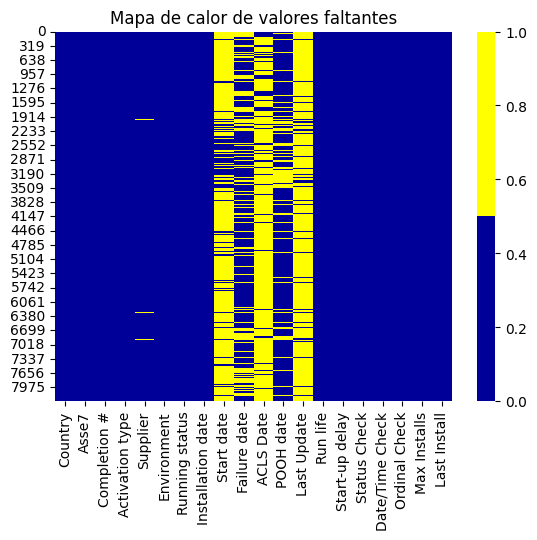

In [ ]:
cols = df.columns[:20]
colours = ['#000099', '#ffff00'] # Especificación de colores - anarillo es missing. Azul es no missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Mapa de calor de valores faltantes')
plt.show()

In [ ]:
df.shape[0]

8289

In [ ]:
# filtar los registros que no son nulos en ACLS Date
df_filtrado = df[~df['ACLS Date'].notnull()]

In [ ]:
872/df_filtrado.shape[0]*100

12.209465135816298

In [ ]:
df_filtrado['Supplier'].value_counts()

,count
Supplier,
QUAKER,2807
GOONER,2156
Unknown,872
ROYAL,681
MAC,290
Mixed,168
ODI,43
ABBAD,32
SNOW,24


In [ ]:
df['Supplier'].value_counts()

,count
Supplier,
QUAKER,3220
GOONER,2332
Unknown,1321
ROYAL,720
MAC,306
Mixed,193
SNOW,46
ODI,43
ABBAD,37


In [ ]:
df.shape[0]

8289

In [ ]:
len(df['ACLS Date'])-df['ACLS Date'].isnull().sum()

1147

In [ ]:
df[['Installation date','Start date','Start-up delay']].iloc[2552:2572]

,Installation date,Start date,Start-up delay
2552,27/10/2018,NaN,0
2553,04/12/2019,06/12/2019,2
2554,11/10/2021,12/10/2021,1
2555,27/02/2024,27/02/2024,0
2556,10/04/2000,10/04/2000,0
2557,27/09/2001,27/09/2001,0
2558,12/02/2002,12/02/2002,0
2559,14/12/2023,NaN,0
2560,06/06/2024,06/06/2024,0
2561,20/06/2014,NaN,0


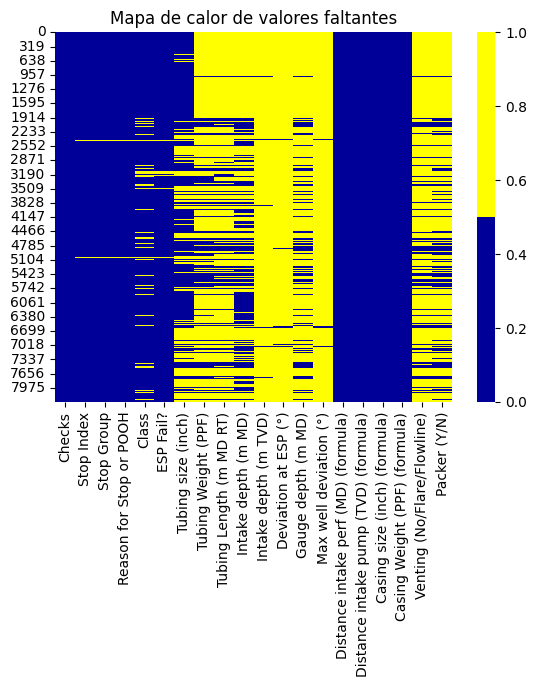

In [ ]:
cols = df.columns[20:40]
colours = ['#000099', '#ffff00'] # Especificación de colores - anarillo es missing. Azul es no missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Mapa de calor de valores faltantes')
plt.show()

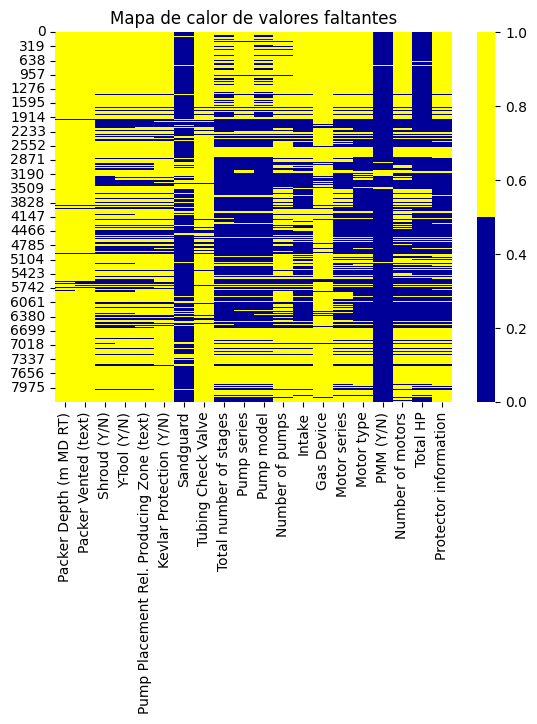

In [ ]:
cols = df.columns[40:60]
colours = ['#000099', '#ffff00'] # Especificación de colores - anarillo es missing. Azul es no missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Mapa de calor de valores faltantes')
plt.show()

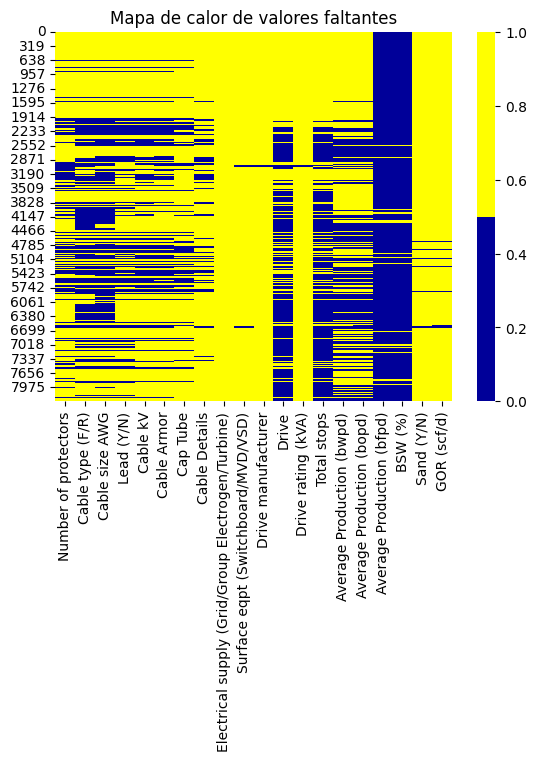

In [ ]:
cols = df.columns[60:80]
colours = ['#000099', '#ffff00'] # Especificación de colores - anarillo es missing. Azul es no missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Mapa de calor de valores faltantes')
plt.show()

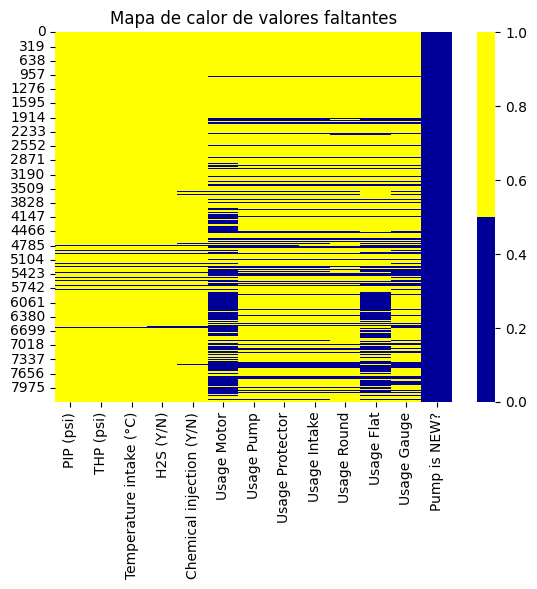

In [ ]:
cols = df.columns[80:100]
colours = ['#000099', '#ffff00'] # Especificación de colores - anarillo es missing. Azul es no missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Mapa de calor de valores faltantes')
plt.show()

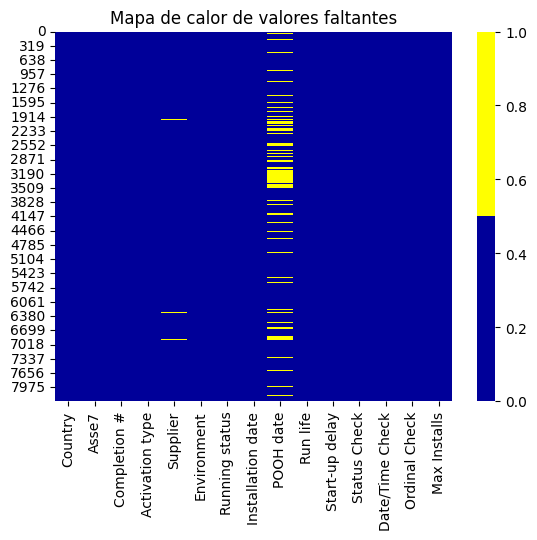

In [ ]:
# escoger las columnas que tengas valores missing por debajo del 20%
cols = df.columns[df.isnull().mean() < 0.2][0:15]
colours = ['#000099', '#ffff00'] # Especificación de colores - anarillo es missing. Azul es no missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Mapa de calor de valores faltantes')
plt.show()

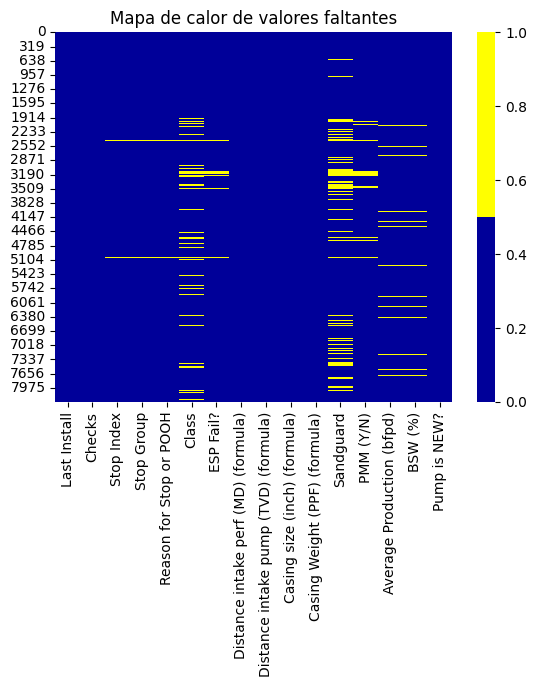

In [ ]:
# escoger las columnas que tengas valores missing por debajo del 20%
cols = df.columns[df.isnull().mean() < 0.2][15:]
colours = ['#000099', '#ffff00'] # Especificación de colores - anarillo es missing. Azul es no missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Mapa de calor de valores faltantes')
plt.show()

In [ ]:
df_raw = df.loc[:, df.isnull().mean() < 0.2]

In [ ]:
df_raw

,Country,Asse7,Completion #,Activation type,Supplier,Environment,Running status,Installation date,POOH date,Run life,...,ESP Fail?,Distance intake perf (MD) (formula),Distance intake pump (TVD) (formula),Casing size (inch) (formula),Casing Weight (PPF) (formula),Sandguard,PMM (Y/N),Average Production (bfpd),BSW (%),Pump is NEW?
0,ARGENTINA,Y8PMX2,1,ESP,Unknown,Offshore,Pulled,24/01/1992,25/10/1995,1354,...,Yes,0,0,"9,625",47,N,N,0,#DIV/0!,Unknown
1,ARGENTINA,Y8PMX2,2,ESP,Unknown,Offshore,Pulled,29/10/1995,07/11/1995,0,...,Yes,0,0,"9,625",47,N,N,0,#DIV/0!,Unknown
2,ARGENTINA,Y8PMX2,3,ESP,Unknown,Offshore,Pulled,09/11/1995,08/12/1995,2,...,No,0,0,"9,625",47,N,N,0,#DIV/0!,Unknown
3,ARGENTINA,Y8PMX2,4,ESP,Unknown,Offshore,Pulled,12/12/1995,14/12/1995,0,...,No,0,0,"9,625",47,N,N,0,#DIV/0!,Unknown
4,ARGENTINA,Y8PMX2,5,ESP,Unknown,Offshore,Pulled,18/12/1995,30/05/1996,163,...,No,0,0,"9,625",47,N,N,0,#DIV/0!,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,UK,IFMI9,8,ESP,ROYAL,Onshore,Pulled,29/09/2020,28/05/2021,241,...,No,"1,372",0,"9,625",40,N,N,0,#DIV/0!,NEW
8285,UK,IFM2X,1,ESP,GOONER,Onshore,Pulled,17/03/1994,25/03/1999,1809,...,Yes,0,0,"9,625",40 & 43.5,N,N,"1,363,956,391","15,774,529",Unknown
8286,UK,IFM2X,2,ESP,GOONER,Onshore,Pulled,04/04/1999,20/08/2000,483,...,No,0,0,"9,625",40 & 43.5,N,N,"1,094,066,785","71,087,662",Unknown
8287,UK,IFM2X,3,ESP,QUAKER,Onshore,Pulled,29/08/2000,30/05/2004,1229,...,Yes,0,0,"9,625",40 & 43.5,N,N,"166,469,984","8,509,401",Unknown


In [ ]:
df_raw.Country.unique()

array(['ARGENTINA', 'CAMEROON', 'CHAD', 'CUBA', 'INDIA', 'IRELAND',
       'CHINA', 'ESPANA', 'CANADA', 'PERU', 'BELGIUM', 'TUNISIA',
       'TURKEY', 'UK'], dtype=object)

In [ ]:
len(df_raw.Asse7.unique())

1391

In [ ]:
# cuenta cada valor de Status Check
df_raw['Status Check'].value_counts()

,count
Status Check,
OK,8288
Data Error,1


In [ ]:
df_raw['Ordinal Check'].value_counts()

,count
Ordinal Check,
Normal,6896
New Well,1381
Redundant Wells,10
Date Error,1
Missing wells,1


In [ ]:
df_raw['Running status'].value_counts()

,count
Running status,
Pulled,6922
Running,575
ACLS,542
Failed,174
Idle,76


In [ ]:
df_raw['Activation type'].value_counts()

,count
Activation type,
ESP,8106
ESPCP,181
RFR-ESP,2


In [ ]:
df_raw['Class'].isnull().sum()

776

In [ ]:
df_raw['Class'].value_counts()

,count
Class,
F,4824
E,933
N,731
U,444
S,174
C,172
L,168
A,65
f,1


In [ ]:
df_raw['ESP Fail?'].value_counts()

,count
ESP Fail?,
Yes,5044
No,2644
Unknown,425
yes,3
NO,2
YES,2


In [ ]:
# hacer una grafica de barras con los valores unicos de cada columna con plt
for col in df_raw.columns:
    print(col)
    print(df_raw[col].unique())
    print(len(df_raw[col].unique()))
    print('\n')


Country
['ARGENTINA' 'CAMEROON' 'CHAD' 'CUBA' 'INDIA' 'IRELAND' 'CHINA' 'ESPANA'
 'CANADA' 'PERU' 'BELGIUM' 'TUNISIA' 'TURKEY' 'UK']
14


Asse7
['Y8PMX2' 'Y8PMX3' 'Y8PMX4' ... 'IFMI8' 'IFMI9' 'IFM2X']
1391


Completion #
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35]
35


Activation type
['ESP' 'ESPCP' 'RFR-ESP']
3


Supplier
['Unknown' 'QUAKER' 'GOONER' 'MAC' 'ROYAL' nan 'Mixed' 'NESTLE' 'SNOW'
 'ABBAD' 'ODI' 'Pending' 'APPLE']
13


Environment
['Offshore' 'Onshore']
2


Running status
['Pulled' 'ACLS' 'Idle' 'Running' 'Failed']
5


Installation date
['24/01/1992' '29/10/1995' '09/11/1995' ... '17/03/1994' '29/08/2000'
 '25/08/2004']
6071


POOH date
['25/10/1995' '07/11/1995' '08/12/1995' ... '09/09/2020' '20/08/2000'
 '31/10/2006']
5250


Run life
[1354    0    2 ... 2553 2296 1809]
2151


Start-up delay
[  0   1   8  19  10   3   9   2  13   6  12   5  30  14   4  16   7 167
  24  22  11  51 260 465 239  18  21  20  39  6

SyntaxError: invalid syntax (<ipython-input-88-990a017fc77e>, line 1)

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               8289 non-null   object 
 1   Asse7                                 8289 non-null   object 
 2   Completion #                          8289 non-null   int64  
 3   Activation type                       8289 non-null   object 
 4   Supplier                              8233 non-null   object 
 5   Environment                           8289 non-null   object 
 6   Running status                        8289 non-null   object 
 7   Installation date                     8288 non-null   object 
 8   POOH date                             6887 non-null   object 
 9   Run life                              8289 non-null   int64  
 10  Start-up delay                        8289 non-null   int64  
 11  Status Check     

In [ ]:
df_raw['Installation date'].isnull().sum()

1

In [ ]:
# encuentra el indice que es null en la columna Installation date
df_raw[df_raw['Installation date'].isnull()].index

Index([3283], dtype='int64')

In [ ]:
# convertir a formato de date
df_raw['Installation date'] = pd.to_datetime(df_raw['Installation date'])

<ipython-input-43-b4ad19962364>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_raw['Installation date'] = pd.to_datetime(df_raw['Installation date'])
<ipython-input-43-b4ad19962364>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Installation date'] = pd.to_datetime(df_raw['Installation date'])


In [ ]:
# cambiar a formato de fecha POOH date
df_raw['POOH date'] = pd.to_datetime(df_raw['POOH date'])

<ipython-input-48-50fdee67b26a>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_raw['POOH date'] = pd.to_datetime(df_raw['POOH date'])
<ipython-input-48-50fdee67b26a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['POOH date'] = pd.to_datetime(df_raw['POOH date'])


In [ ]:
# cambiar a int run life
df_raw['Run life'] = df_raw['Run life'].astype(int)

<ipython-input-49-7d31fdc52777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Run life'] = df_raw['Run life'].astype(int)


In [ ]:
# completion # cambiar a int
df_raw['Completion #'] = df_raw['Completion #'].astype(int)

<ipython-input-51-7464ad862849>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Completion #'] = df_raw['Completion #'].astype(int)


In [ ]:
# cambiar Start-up delay a int
df_raw['Start-up delay'] = df_raw['Start-up delay'].astype(int)

<ipython-input-52-718f4bd1351a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Start-up delay'] = df_raw['Start-up delay'].astype(int)


In [ ]:
# cambiar Max Installs a int
df_raw['Max Installs'] = df_raw['Max Installs'].astype(int)

<ipython-input-53-d838b8a529e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Max Installs'] = df_raw['Max Installs'].astype(int)


In [ ]:
# colocar nan en espacios missing en Average Production (bfpd)
df_raw['Average Production (bfpd)'] = df_raw['Average Production (bfpd)'].replace(' ', 'NaN')

<ipython-input-56-e5f4693e8397>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Average Production (bfpd)'] = df_raw['Average Production (bfpd)'].replace(' ', 'NaN')


In [ ]:
# reemplazar NaN por 0 en Average Production (bfpd)
df_raw['Average Production (bfpd)'] = df_raw['Average Production (bfpd)'].replace('NaN', 0)

<ipython-input-58-95fb554d862f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Average Production (bfpd)'] = df_raw['Average Production (bfpd)'].replace('NaN', 0)


In [ ]:
# mirar cuantos valores missing tiene Average Production (bfpd)
df_raw['Average Production (bfpd)'].isnull().sum()

13

In [ ]:
df_raw['Average Production (bfpd)'] = df_raw['Average Production (bfpd)'].replace('Missing data', None)


<ipython-input-66-b2b81c71e579>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Average Production (bfpd)'] = df_raw['Average Production (bfpd)'].replace('Missing data', None)


In [ ]:
df_raw['Average Production (bfpd)'] = pd.to_numeric(df_raw['Average Production (bfpd)'], errors='coerce')


<ipython-input-68-940f20da0838>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Average Production (bfpd)'] = pd.to_numeric(df_raw['Average Production (bfpd)'], errors='coerce')


In [ ]:
df_reducido = df[df.columns[:14]]

In [ ]:
df_reducido.head(5)

,COUNTRY,ASSET,COMPLETION_NUMBER,ACTIVATION_TYPE,SUPPLIER,ENVIRONMENT,RUNNING_STATUS,INSTALLATION_DATE,START_DATE,FAILURE_DATE,ACLS_DATE,POOH_DATE,LAST_UPDATE,RUN_LIFE
0,ARGENTINA,Y8PMX2,1,ESP,UNKNOWN,OFFSHORE,PULLED,1992-01-24,1992-01-24,09/10/1995,NaT,1995-10-25,0,1354
1,ARGENTINA,Y8PMX2,2,ESP,UNKNOWN,OFFSHORE,PULLED,1995-10-29,1995-10-29,29/10/1995,NaT,1995-11-07,0,0
2,ARGENTINA,Y8PMX2,3,ESP,UNKNOWN,OFFSHORE,PULLED,1995-11-09,1995-11-09,11/11/1995,NaT,1995-12-08,0,2
3,ARGENTINA,Y8PMX2,4,ESP,UNKNOWN,OFFSHORE,PULLED,1995-12-12,1995-12-12,12/12/1995,NaT,1995-12-14,0,0
4,ARGENTINA,Y8PMX2,5,ESP,UNKNOWN,OFFSHORE,PULLED,1995-12-18,1995-12-18,29/05/1996,NaT,1996-05-30,0,163


In [ ]:
df_reducido.columns

Index(['COUNTRY', 'ASSET', 'COMPLETION_NUMBER', 'ACTIVATION_TYPE', 'SUPPLIER',
       'ENVIRONMENT', 'RUNNING_STATUS', 'INSTALLATION_DATE', 'START_DATE',
       'FAILURE_DATE', 'ACLS_DATE', 'POOH_DATE', 'LAST_UPDATE', 'RUN_LIFE'],
      dtype='object')

In [ ]:
len(list(df_reducido.FAILURE_DATE))

8289

In [ ]:
len(list(df_reducido.ACLS_DATE))

8289

## Paro Voluntario y Falla de equipo

In [ ]:
count = ((df_reducido['FAILURE_DATE'].notna()) & (df_reducido['ACLS_DATE'].notna())).sum()
print(count)
indices = df_reducido.index[(df_reducido['FAILURE_DATE'].notna()) & (df_reducido['ACLS_DATE'].notna())]
print(indices)

71
Index([ 610, 1791, 1857, 1974, 1995, 2009, 2079, 2095, 2097, 2217, 2296, 2318,
       2338, 2341, 2349, 2366, 2383, 2441, 2478, 2480, 2512, 2531, 2533, 2693,
       2711, 2835, 2860, 2863, 2879, 2894, 2914, 3205, 3391, 3401, 3637, 3688,
       3769, 3772, 3853, 3930, 4280, 4417, 4470, 4471, 4647, 4679, 4910, 4917,
       5049, 5392, 5529, 5530, 5592, 5621, 5623, 5766, 5977, 6746, 7061, 7123,
       7141, 7148, 7181, 7194, 7313, 7330, 7507, 8100, 8141, 8245, 8250],
      dtype='int64')


In [ ]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   COUNTRY            8289 non-null   object         
 1   ASSET              8289 non-null   object         
 2   COMPLETION_NUMBER  8289 non-null   int64          
 3   ACTIVATION_TYPE    8289 non-null   object         
 4   SUPPLIER           8233 non-null   object         
 5   ENVIRONMENT        8289 non-null   object         
 6   RUNNING_STATUS     8289 non-null   object         
 7   INSTALLATION_DATE  8288 non-null   datetime64[ns] 
 8   START_DATE         8288 non-null   datetime64[ns] 
 9   FAILURE_DATE       6084 non-null   datetime64[ns] 
 10  ACLS_DATE          1147 non-null   datetime64[ns] 
 11  POOH_DATE          6887 non-null   datetime64[ns] 
 12  LAST_UPDATE        8289 non-null   int64          
 13  RUN_LIFE           8289 non-null   int64        

In [ ]:
df_reducido.iloc[indices]

,COUNTRY,ASSET,COMPLETION_NUMBER,ACTIVATION_TYPE,SUPPLIER,ENVIRONMENT,RUNNING_STATUS,INSTALLATION_DATE,START_DATE,FAILURE_DATE,ACLS_DATE,POOH_DATE,LAST_UPDATE,RUN_LIFE,RUN_LIFE_2
610,ARGENTINA,Y8PM49,20,ESP,GOONER,OFFSHORE,PULLED,2019-02-18,2019-02-18,2022-05-04,2019-10-01,2022-08-24,0,225,225 days
1791,ARGENTINA,VMLM57,17,ESP,QUAKER,OFFSHORE,PULLED,2007-10-27,2007-10-27,2018-05-13,2018-05-13,2023-08-17,0,3851,3851 days
1857,ARGENTINA,VMLM62,6,ESP,UNKNOWN,OFFSHORE,ACLS,2000-03-23,2000-03-23,2001-02-10,2001-02-10,2016-02-24,0,324,324 days
1974,CAMEROON,VUMMXX3U7,1,ESP,GOONER,OFFSHORE,ACLS,2022-07-12,2022-07-13,2022-10-24,2022-10-28,NaT,0,104,104 days
1995,CAMEROON,7KMMX3,2,ESP,GOONER,OFFSHORE,PULLED,2017-11-05,2017-05-11,2021-07-09,2020-11-16,2021-07-11,0,1107,1107 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7507,TURKEY,K7UMX3,3,ESP,QUAKER,ONSHORE,ACLS,2009-10-02,2009-10-02,2013-11-23,2014-01-22,2013-12-27,0,1513,1513 days
8100,TURKEY,YZLMX2,2,ESP,QUAKER,ONSHORE,ACLS,2006-02-11,2006-02-11,2014-06-29,2014-05-15,NaT,0,3015,3015 days
8141,TURKEY,YVVMX3,3,ESP,QUAKER,ONSHORE,ACLS,2002-11-30,2002-11-30,2011-10-08,2011-11-06,NaT,0,3234,3234 days
8245,UK,IFMX8,1,ESP,GOONER,ONSHORE,ACLS,1990-03-21,1990-03-21,2004-11-22,2004-11-22,2004-11-22,0,5360,5360 days


In [ ]:
count = ((df_reducido_failure['FAILURE_DATE'].notna()) &
         (df_reducido_failure['ACLS_DATE'].notna())).sum()
print(count)
indices = df_reducido_failure.index[(df_reducido_failure['FAILURE_DATE'].notna()) &
                                    (df_reducido_failure['ACLS_DATE'].notna())]
print(indices)

71
Index([ 610, 1791, 1857, 1974, 1995, 2009, 2079, 2095, 2097, 2217, 2296, 2318,
       2338, 2341, 2349, 2366, 2383, 2441, 2478, 2480, 2512, 2531, 2533, 2693,
       2711, 2835, 2860, 2863, 2879, 2894, 2914, 3205, 3391, 3401, 3637, 3688,
       3769, 3772, 3853, 3930, 4280, 4417, 4470, 4471, 4647, 4679, 4910, 4917,
       5049, 5392, 5529, 5530, 5592, 5621, 5623, 5766, 5977, 6746, 7061, 7123,
       7141, 7148, 7181, 7194, 7313, 7330, 7507, 8100, 8141, 8245, 8250],
      dtype='int64')


In [ ]:
# exportar a csv
df_reducido_failure.to_csv(f'{BASE_FOLDER}/mantenimiento_equipos_reducido.csv', index=False)

In [ ]:
df_reducido_failure

,COUNTRY,ASSET,COMPLETION_NUMBER,ACTIVATION_TYPE,SUPPLIER,ENVIRONMENT,RUNNING_STATUS,INSTALLATION_DATE,START_DATE,FAILURE_DATE,ACLS_DATE,POOH_DATE,LAST_UPDATE,RUN_LIFE,RUN_LIFE_2
0,ARGENTINA,Y8PMX2,1,ESP,UNKNOWN,OFFSHORE,PULLED,1992-01-24,1992-01-24,1995-10-09,NaT,1995-10-25,0,1354,1354 days
1,ARGENTINA,Y8PMX2,2,ESP,UNKNOWN,OFFSHORE,PULLED,1995-10-29,1995-10-29,1995-10-29,NaT,1995-11-07,0,0,0 days
2,ARGENTINA,Y8PMX2,3,ESP,UNKNOWN,OFFSHORE,PULLED,1995-11-09,1995-11-09,1995-11-11,NaT,1995-12-08,0,2,2 days
3,ARGENTINA,Y8PMX2,4,ESP,UNKNOWN,OFFSHORE,PULLED,1995-12-12,1995-12-12,1995-12-12,NaT,1995-12-14,0,0,0 days
4,ARGENTINA,Y8PMX2,5,ESP,UNKNOWN,OFFSHORE,PULLED,1995-12-18,1995-12-18,1996-05-29,NaT,1996-05-30,0,163,163 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8282,UK,IFMI9,6,ESP,GOONER,ONSHORE,PULLED,2007-05-17,2007-05-17,2014-05-13,NaT,2014-05-13,0,2553,2553 days
8285,UK,IFM2X,1,ESP,GOONER,ONSHORE,PULLED,1994-03-17,1994-03-17,1999-02-28,NaT,1999-03-25,0,1809,1809 days
8286,UK,IFM2X,2,ESP,GOONER,ONSHORE,PULLED,1999-04-04,1999-04-04,2000-07-30,NaT,2000-08-20,0,483,483 days
8287,UK,IFM2X,3,ESP,QUAKER,ONSHORE,PULLED,2000-08-29,2000-08-29,2004-01-10,NaT,2004-05-30,0,1229,1229 days


In [ ]:
# pasar a formato de date
df.INSTALLATION_DATE = pd.to_datetime(df.INSTALLATION_DATE)

In [ ]:
df.ACLS_DATE = pd.to_datetime(df.ACLS_DATE)

<ipython-input-61-76c1182e2730>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.ACLS_DATE = pd.to_datetime(df.ACLS_DATE)


In [ ]:
df.POOH_DATE = pd.to_datetime(df.POOH_DATE)

In [ ]:
df['FAILURE_DATE_2'] = pd.to_datetime(df['FAILURE_DATE'], dayfirst=True, errors='coerce')

In [ ]:
df[['FAILURE_DATE', 'FAILURE_DATE_2']]

,FAILURE_DATE,FAILURE_DATE_2
0,09/10/1995,1995-10-09
1,29/10/1995,1995-10-29
2,11/11/1995,1995-11-11
3,12/12/1995,1995-12-12
4,29/05/1996,1996-05-29
...,...,...
8284,NaN,NaT
8285,28/2/1999,1999-02-28
8286,30/7/2000,2000-07-30
8287,10/1/2004,2004-01-10


In [ ]:
count = (~(df['FAILURE_DATE'].notna()) ^ ~(df['FAILURE_DATE_2'].notna())).sum()
print(count)

0


In [ ]:
indices = df.index[~(df['FAILURE_DATE'].notna()) | ~(df['FAILURE_DATE_2'].notna())]
print(indices)

Index([  13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
       ...
       8244, 8246, 8247, 8255, 8265, 8267, 8270, 8276, 8283, 8284],
      dtype='int64', length=2205)


In [ ]:
df.iloc[indices][['FAILURE_DATE', 'FAILURE_DATE_2']].isnull().sum()

,0
FAILURE_DATE,2205
FAILURE_DATE_2,2205


In [ ]:
df['FAILURE_DATE'] = pd.to_datetime(df['FAILURE_DATE'], dayfirst=True, errors='coerce')

In [ ]:
df_reducido = df[df.columns[:14]]

In [ ]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   COUNTRY            8289 non-null   object        
 1   ASSET              8289 non-null   object        
 2   COMPLETION_NUMBER  8289 non-null   int64         
 3   ACTIVATION_TYPE    8289 non-null   object        
 4   SUPPLIER           8233 non-null   object        
 5   ENVIRONMENT        8289 non-null   object        
 6   RUNNING_STATUS     8289 non-null   object        
 7   INSTALLATION_DATE  8288 non-null   datetime64[ns]
 8   START_DATE         8288 non-null   datetime64[ns]
 9   FAILURE_DATE       6084 non-null   datetime64[ns]
 10  ACLS_DATE          1147 non-null   datetime64[ns]
 11  POOH_DATE          6887 non-null   datetime64[ns]
 12  LAST_UPDATE        8289 non-null   int64         
 13  RUN_LIFE           8289 non-null   int64         
dtypes: datet

In [ ]:
# dejar solo fecha y no la hora
df.INSTALLATION_DATE = df.INSTALLATION_DATE.dt.date

In [ ]:
# reemplazar en varlor NaN de Start date por el correspondiente valor de INSTALATION_DATE
df['START_DATE'] = df['START_DATE'].fillna(df['INSTALLATION_DATE'])

In [ ]:
df.START_DATE = pd.to_datetime(df.START_DATE)

In [ ]:
# crear una columna llamana FAILURE_ACLS_DATE con la condición de tomar el valor disponible en cada registro ya es de failure date o de acls data
df['FAILURE_ACLS_DATE'] = df['Failure date'].fillna(df['ACLS Date'])

In [ ]:
print(f'Número de filas: {df.shape[0]}')
print(f'Número de variables: {df.shape[1]}')

Número de filas: 8289
Número de variables: 93


In [ ]:
df.isnull().sum()

,0
Country,0
Asse7,0
Completion #,0
Activation type,0
Supplier,56
...,...
Usage Intake,6852
Usage Round,6983
Usage Flat,5710
Usage Gauge,6467


## Análisis descriptivo

In [ ]:
df_reducido_failure.head(5)

,COUNTRY,ASSET,COMPLETION_NUMBER,ACTIVATION_TYPE,SUPPLIER,ENVIRONMENT,RUNNING_STATUS,INSTALLATION_DATE,START_DATE,FAILURE_DATE,ACLS_DATE,POOH_DATE,LAST_UPDATE,RUN_LIFE,RUN_LIFE_2
0,ARGENTINA,Y8PMX2,1,ESP,UNKNOWN,OFFSHORE,PULLED,1992-01-24,1992-01-24,1995-10-09,NaT,1995-10-25,0,1354,1354 days
1,ARGENTINA,Y8PMX2,2,ESP,UNKNOWN,OFFSHORE,PULLED,1995-10-29,1995-10-29,1995-10-29,NaT,1995-11-07,0,0,0 days
2,ARGENTINA,Y8PMX2,3,ESP,UNKNOWN,OFFSHORE,PULLED,1995-11-09,1995-11-09,1995-11-11,NaT,1995-12-08,0,2,2 days
3,ARGENTINA,Y8PMX2,4,ESP,UNKNOWN,OFFSHORE,PULLED,1995-12-12,1995-12-12,1995-12-12,NaT,1995-12-14,0,0,0 days
4,ARGENTINA,Y8PMX2,5,ESP,UNKNOWN,OFFSHORE,PULLED,1995-12-18,1995-12-18,1996-05-29,NaT,1996-05-30,0,163,163 days


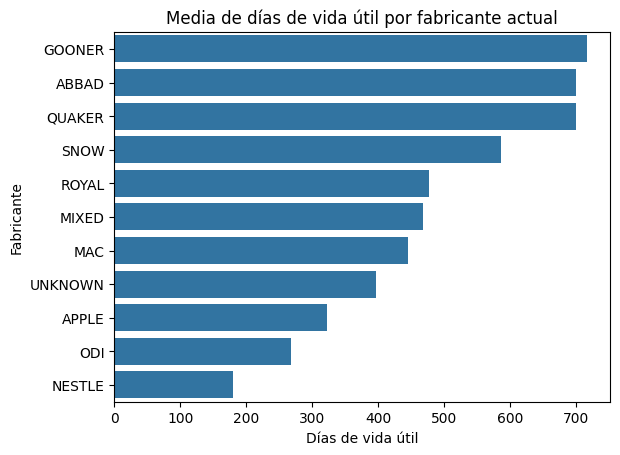

In [ ]:
# hacer un groupby por marca tomando promedio de run life 2
grouped = df_reducido_failure.groupby('SUPPLIER')['RUN_LIFE'].mean().sort_values(ascending=False)
sns.barplot(y=grouped.index, x=grouped.values, orient="h")
plt.xlabel("Días de vida útil")
plt.ylabel("Fabricante")
plt.title("Media de días de vida útil por fabricante actual")
plt.savefig(f'{BASE_FOLDER}/media_run_life_fabricante actual.png')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

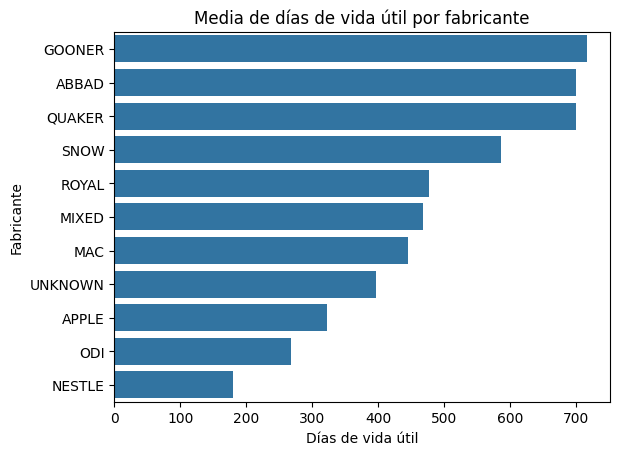

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped = df_reducido_failure.groupby('SUPPLIER')['RUN_LIFE'].mean().sort_values(ascending=False)
sns.barplot(y=grouped.index, x=grouped.values, orient="h")
plt.xlabel("Días de vida útil")
plt.ylabel("Fabricante")
plt.title("Media de días de vida útil por fabricante")
plt.savefig(f'{BASE_FOLDER}/media_run_life_fabricante.png')
plt.show()

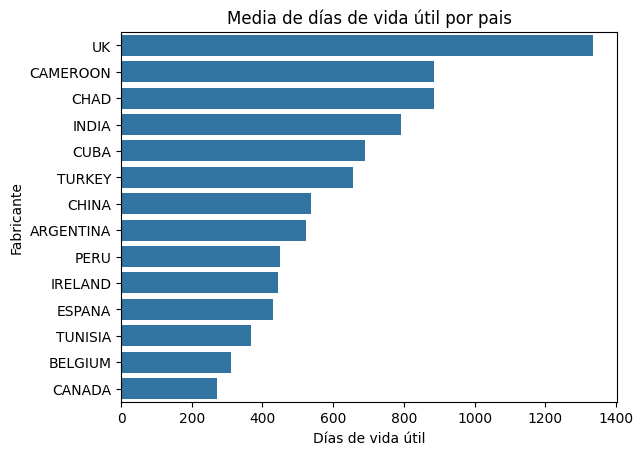

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped = df_reducido_failure.groupby('COUNTRY')['RUN_LIFE'].mean().sort_values(ascending=False)
sns.barplot(y=grouped.index, x=grouped.values, orient="h")
plt.xlabel("Días de vida útil")
plt.ylabel("Fabricante")
plt.title("Media de días de vida útil por pais")
plt.savefig(f'{BASE_FOLDER}/media_run_life_pais.png')
plt.show()

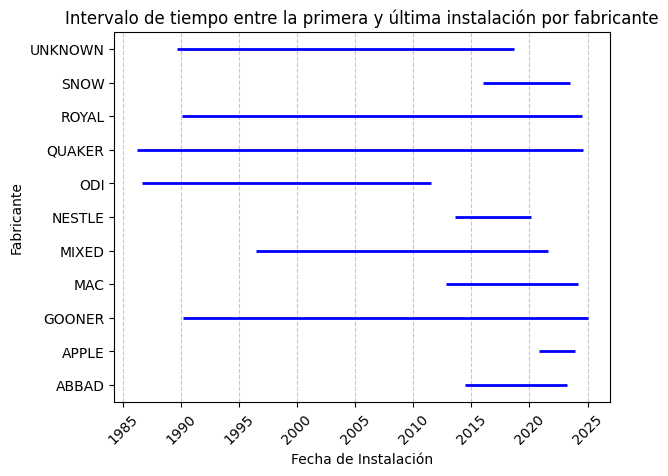

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener fecha mínima y máxima por fabricante
date_ranges = df_reducido_failure.groupby('SUPPLIER')['INSTALLATION_DATE'].agg(['min', 'max']).reset_index()
for i, row in date_ranges.iterrows():
    plt.hlines(y=row['SUPPLIER'], xmin=row['min'], xmax=row['max'], color='blue', linewidth=2)

plt.xlabel("Fecha de Instalación")
plt.ylabel("Fabricante")
plt.title("Intervalo de tiempo entre la primera y última instalación por fabricante")
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig(f'{BASE_FOLDER}/intervalos_temporales_por_fabricante.png')
plt.show()

In [ ]:
# esportar la imagen anterior
plt.savefig(f'{BASE_FOLDER}/intervalos_temporales_por_fabricante.png')

<Figure size 640x480 with 0 Axes>